In [1]:
install.packages(c("ica", "tidyverse", "ggplot2"))

Installing packages into ‘/gpfs/global_fs01/sym_shared/YPProdSpark/user/sd0d-fcf671d182be38-e61d2f729a4c/R/libs’
(as ‘lib’ is unspecified)


In [6]:
library(tidyverse)
library(ica)
library(ggplot2)
# detach('package:tidyverse')

### create blind signals
The first thing to do is to generate some signals. The classic example, and the original use case for this algorithm, is simply equally-spaced time-series data.

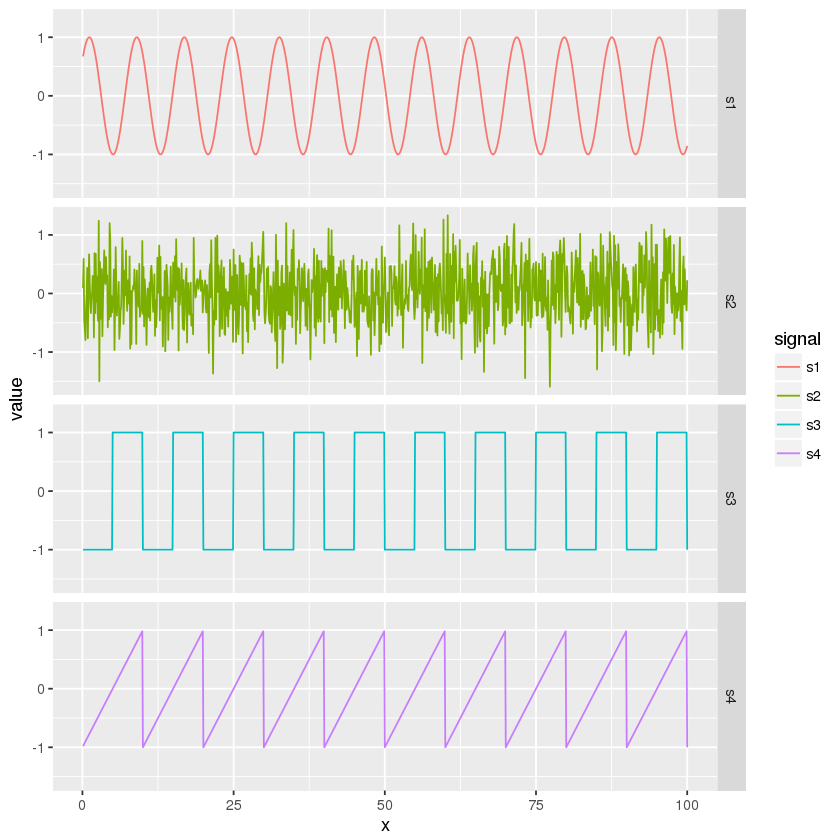

In [63]:
squarewave <- function(tt) {
    ifelse((tt %% 100) < 50, 0, 1) - 0.5
}

sawttoothwave <- function(tt) {
    (tt %% 100)/100 - 0.5
}

N = 1000
x <- seq(1:N)

s1 <- sin(x*0.08 + runif(n = 1, min = -1, max = 1)*pi)
s2 <- rnorm(n = N, mean = 0, sd = .5)
s3 <- squarewave(x)*2
s4 <- sawttoothwave(x)*2

S <- tibble(x = x*0.1, s1, s2, s3, s4)

S_plot <- gather(S, key = "signal", value = "value", -x)
ggplot(data = S_plot, aes(x = x, y = value, color = signal)) + 
    geom_line() +
    facet_grid(signal ~ .)

### create idealized signals
Make some measured signals that are the linear combination of the underlying signals.

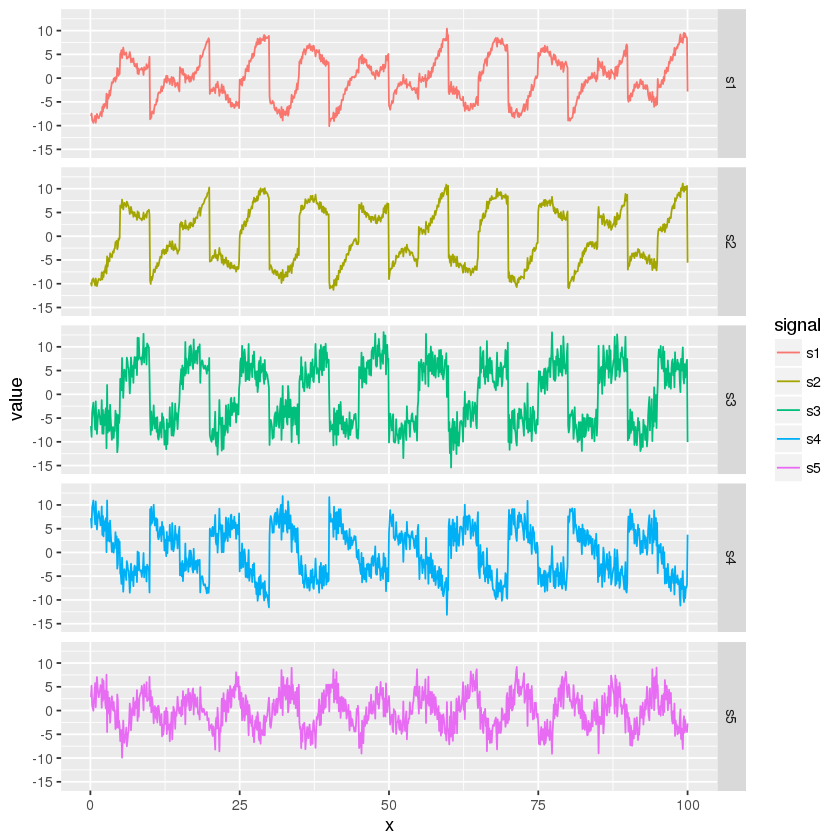

In [81]:
X <- as.matrix(S %>% select(contains('s')))
A <- matrix(runif(20, min = -5, max = 5), 4, 5)

Y <- X %*% A
Y_plot <- tibble(x = S$x, s1 = Y[,1], s2 = Y[,2], s3 = Y[,3], s4 = Y[,4], s5 = Y[,5])

Y_plot <- gather(Y_plot, key = "signal", value = "value", -x)

ggplot(data = Y_plot, aes(x = x, y = value, color = signal)) +
       geom_line() +
       facet_grid(signal ~ .)

### run the the ICA algorithm

In [70]:
Y_out <- icafast(Y, 2)
S_out <- tibble(x = S$x, s1 = Y_out$S[,1], s2 = Y_out$S[,2])##, s3 = Y_out$S[,3], s4 = Y_out$S[,4])

### plot ICA vectors

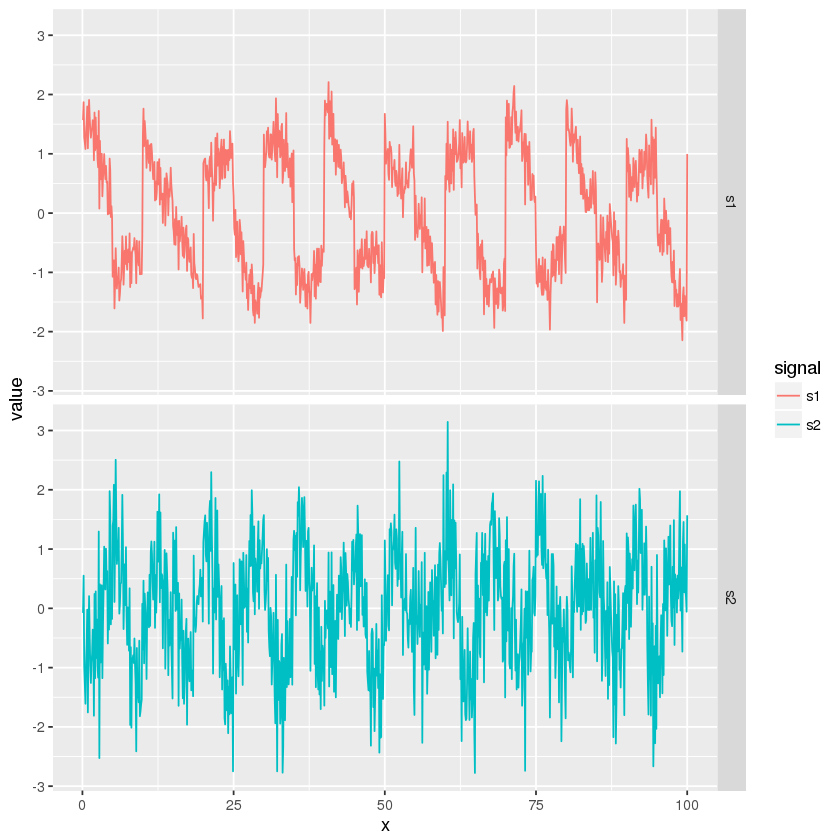

In [79]:
S_out_plot <- gather(S_out, key = "signal", value = "value", -x)
ggplot(data = S_out_plot, aes(x = x, y = value, color = signal)) + 
    geom_line() +
    facet_grid(signal ~ .)

### reconstruct the original signals

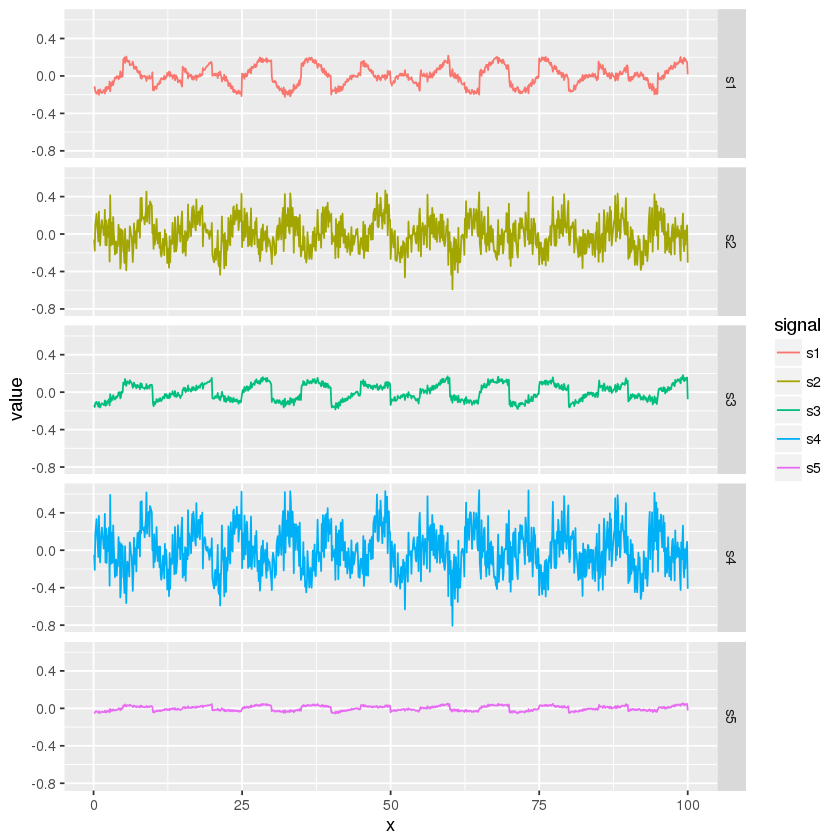

In [80]:
Y_recon <- Y_out$S %*% Y_out$W
Y_recon_plot <- tibble(x = S$x, s1 = Y_recon[,1], s2 = Y_recon[,2], s3 = Y_recon[,3], s4 = Y_recon[,4], s5 = Y_recon[,5])

Y_recon_plot <- gather(Y_recon_plot, key = "signal", value = "value", -x)

ggplot(data = Y_recon_plot, aes(x = x, y = value, color = signal)) +
       geom_line() +
       facet_grid(signal ~ .)